In [8]:
import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

#event_prefix = ['event000001000', 'event000001002']
event_prefix = 'event000001002'
hits, cells, particles, truth = load_event(os.path.join('train_100_events/', event_prefix))


In [9]:
mem_bytes = (hits.memory_usage(index=True).sum() 
             + cells.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())
print('{} memory usage {:.2f} MB'.format(event_prefix, mem_bytes / 2**20))

event000001002 memory usage 19.14 MB


In [19]:
hits.abs()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1.0,64.478401,3.645150,1502.5,7.0,2.0,1.0
1,2.0,65.397301,10.488300,1502.5,7.0,2.0,1.0
2,3.0,57.644199,0.148168,1502.5,7.0,2.0,1.0
3,4.0,90.221001,7.777640,1502.5,7.0,2.0,1.0
4,5.0,65.970802,13.492600,1502.5,7.0,2.0,1.0
5,6.0,65.739998,13.424300,1502.5,7.0,2.0,1.0
6,7.0,96.727303,14.007300,1502.5,7.0,2.0,1.0
7,8.0,99.375801,2.579890,1502.5,7.0,2.0,1.0
8,9.0,82.225899,0.828928,1502.5,7.0,2.0,1.0
9,10.0,90.080498,0.243382,1502.5,7.0,2.0,1.0


In [16]:
cells.head()

,hit_id,ch0,ch1,value
0,1,139,614,0.298932
1,2,274,639,0.051570
2,2,274,640,0.252601
3,3,80,488,0.337003
4,4,181,1076,0.269371


In [17]:
particle.head()


particle_id    1.351104e+17
vx             9.222340e-03
vy            -1.809580e-02
vz            -5.714170e+00
px             3.659910e-01
Name: 2441, dtype: float64

In [18]:
truth.abs()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1.0,9.007220e+16,64.474701,3.657340,1502.5,0.217525,0.034422,5.155970,0.000007
1,2.0,5.404376e+17,65.382896,10.487900,1502.5,1.425240,0.246886,32.947498,0.000015
2,3.0,2.341956e+17,57.647400,0.125236,1502.5,0.931333,0.015618,24.491800,0.000016
3,4.0,1.170957e+17,90.239700,7.775920,1502.5,1.185200,0.130636,19.885599,0.000014
4,5.0,5.269220e+17,65.984001,13.491800,1502.5,0.263797,0.075050,6.171440,0.000007
5,6.0,2.341956e+17,65.742599,13.402600,1502.5,0.917010,0.165886,20.900999,0.000010
6,7.0,7.836293e+17,96.711502,14.003500,1502.5,0.297834,0.013237,4.623150,0.000006
7,8.0,1.171031e+17,99.390099,2.589980,1502.5,1.910310,0.073798,29.201401,0.000023
8,9.0,0.000000e+00,82.227798,0.825875,1502.5,233656.000000,53734.101562,970833.000000,0.000000
9,10.0,6.305056e+17,90.097099,0.238459,1502.5,0.321139,0.031106,5.458470,0.000005


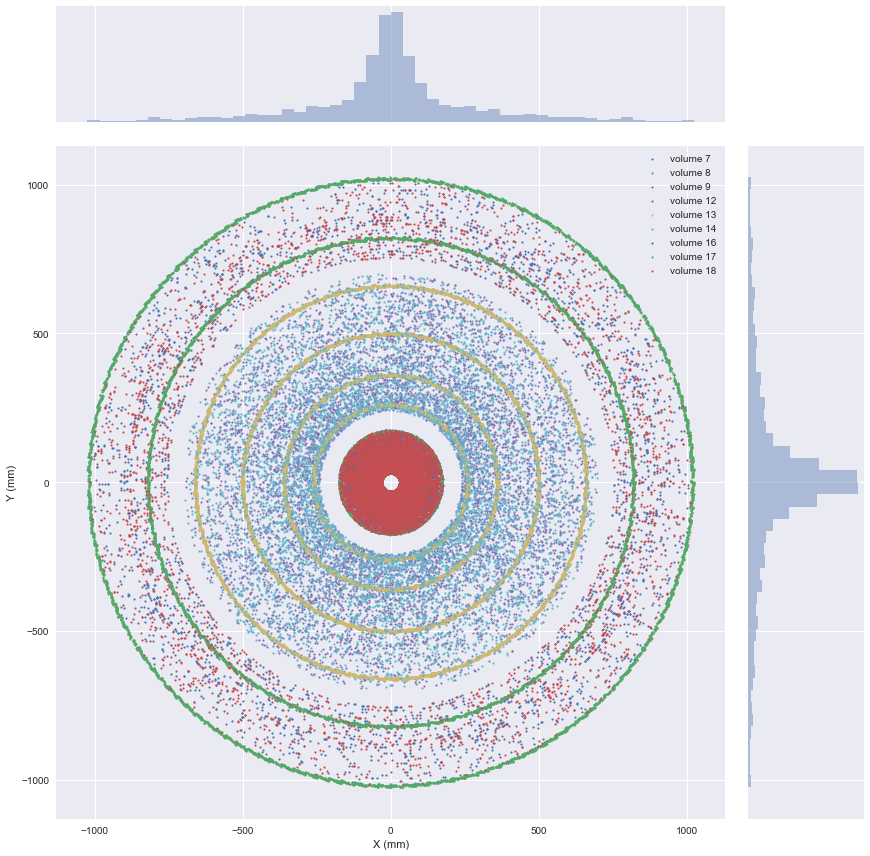

In [11]:
g = sns.jointplot(hits.x, hits.y,  s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

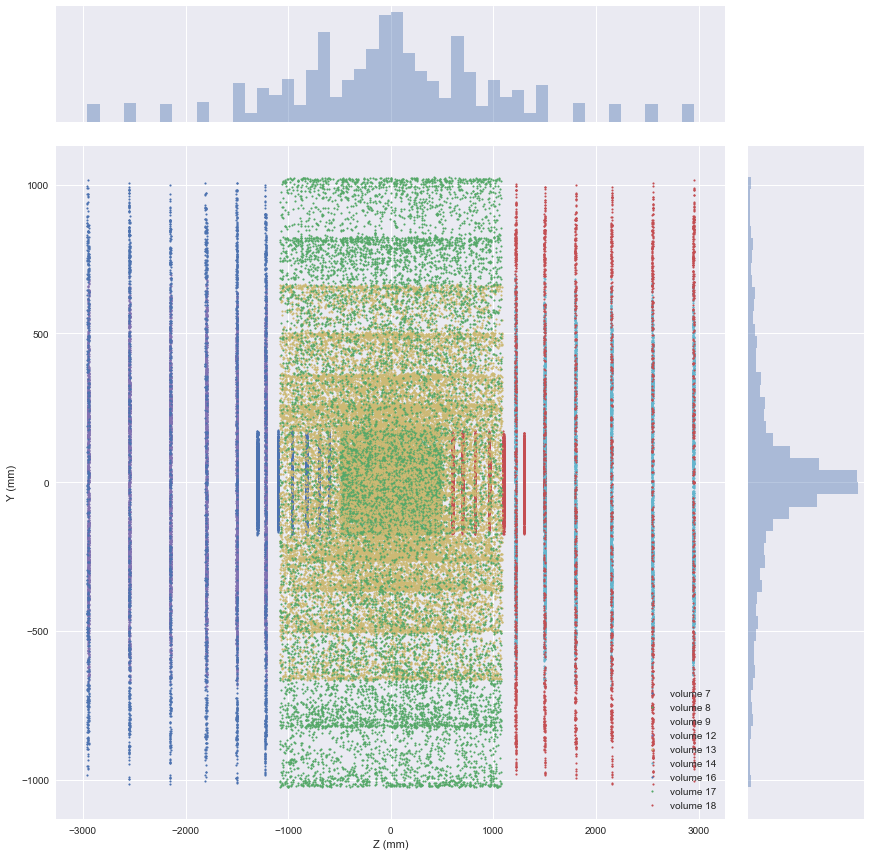

In [12]:
g = sns.jointplot(hits.z, hits.y, s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

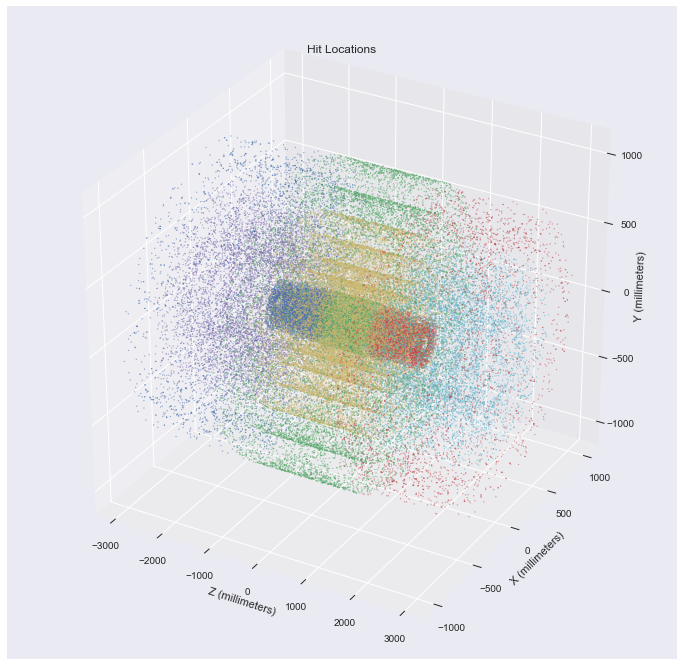

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
ax.set_title('Hit Locations')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
plt.show()

In [14]:
hits_sample = hits.sample(8000)
sns.pairplot(hits_sample, hue='volume_id', size=8)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


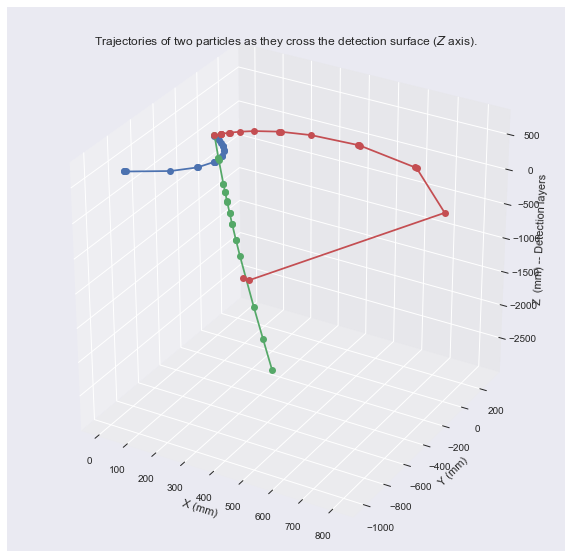

In [22]:
particle = particles.loc[particles.nhits == particles.nhits.max()].iloc[0]
particle2 = particles.loc[particles.nhits == particles.nhits.max()].iloc[1]
particle3 = particles.loc[particles.nhits == particles.nhits.max()].iloc[2]


# Get points where the same particle intersected subsequent layers of the observation material
p_traj_surface = truth[truth.particle_id == particle.particle_id][['tx', 'ty', 'tz']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['tx', 'ty', 'tz']]
p_traj_surface3 = truth[truth.particle_id == particle3.particle_id][['tx', 'ty', 'tz']]


p_traj = (p_traj_surface
          .append({'tx': particle.vx, 'ty': particle.vy, 'tz': particle.vz}, ignore_index=True)
          .sort_values(by='tz'))
p_traj2 = (p_traj_surface2
          .append({'tx': particle2.vx, 'ty': particle2.vy, 'tz': particle2.vz}, ignore_index=True)
          .sort_values(by='tz'))

p_traj3 = (p_traj_surface3
          .append({'tx': particle3.vx, 'ty': particle3.vy, 'tz': particle3.vz}, ignore_index=True)
          .sort_values(by='tz'))



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    xs=p_traj.tx,
    ys=p_traj.ty,
    zs=p_traj.tz, marker='o')
ax.plot(
    xs=p_traj2.tx,
    ys=p_traj2.ty,
    zs=p_traj2.tz, marker='o')
ax.plot(
    xs=p_traj3.tx,
    ys=p_traj3.ty,
    zs=p_traj3.tz, marker='o')


ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z  (mm) -- Detection layers')
plt.title('Trajectories of two particles as they cross the detection surface ($Z$ axis).')
plt.show()